## Youtube comments downloading

In [ ]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import pandas as pd

DEVELOPER_KEY = ' '
YOUTUBE_API_SERVICE_NAME = 'youtube'
YOUTUBE_API_VERSION = 'v3'

In [ ]:
def get_video_comments(service, **kwargs):
    comments, dates, likes = [], [], []
    results = service.commentThreads().list(**kwargs).execute()

    while results:
        for item in results['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            date = item['snippet']['topLevelComment']['snippet']['publishedAt']
            #like = item['snippet']['topLevelComment']['snippet']['likeCount']

            comments.append(comment)
            dates.append(date)
            #likes.append(like)

        # check if there are more comments
        if 'nextPageToken' in results:
            kwargs['pageToken'] = results['nextPageToken']
            results = service.commentThreads().list(**kwargs).execute()
        else:
            break

    return pd.DataFrame({'Comments': comments, 'Date': dates})

In [ ]:
comments_df = None

def main(video_id):
    global comments_df

    # Build the service
    youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=DEVELOPER_KEY)

    # Get the comments
    comments_df = get_video_comments(youtube, part='snippet', videoId=video_id, textFormat='plainText')
    #comments_df = comments_df.drop('Date', 'Likes', axis=1)

if __name__ == '__main__':
    main('Pz68t3RGeqI')

print(comments_df.head())

                                            Comments                  Date
0                             She looks like you!😂❤️  2023-10-11T22:39:55Z
1                                                很好看  2023-10-10T03:49:02Z
2  U look Like Duygu ozaslan she's youtuber like ...  2023-10-08T18:27:40Z
3                                             Cute ❤  2023-10-08T00:16:34Z
4                                                 <3  2023-10-07T22:33:32Z


## Comments preprocessing


In [ ]:
def clean_emoji(dataframe,colomn):
    dataframe[colomn]=dataframe[colomn].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", "", x, flags=re.MULTILINE))
    dataframe[colomn]=dataframe[colomn].apply(lambda x: re.sub(r"[^\w\s]", "", x))
    return dataframe


In [ ]:
## Data needs to be cleaned and text should be preprocessed according to the model requirements.

## Load Reviews into DataFrame and Score

In [ ]:
comments_df['Date'] = pd.to_datetime(comments_df['Date'], format='%Y-%m-%dT%H:%M:%SZ')

In [ ]:
comments_df['Sentiment'] = predicted_labels

In [ ]:
def sentiment(value):
    if value == 1:
        return "Positive"
    elif value == 0:
      return 'Negative'
comments_df['Sentiment'] = comments_df['Sentiment'].apply(sentiment)

In [ ]:
comments_df.head(30)

##Analysis

In [ ]:
print(sns.color_palette("muted").as_hex())

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


In [ ]:
#Countplot for Sentiment Distribution

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.countplot(x="Sentiment", data=comments_df, palette="muted")
plt.title("Sentiment Distribution of Comments")
plt.show()


In [ ]:
#Time Series Analysis of Sentiment:

plt.figure(figsize=(20, 6))
sns.lineplot(x="Date", y="Sentiment", data=comments_df, marker='o', color='#d65f5f')
plt.title("Time Series Analysis of Sentiment")
plt.xticks(rotation=30)
plt.show()

In [ ]:
#Distribution of Comment Length by Sentiment:

plt.figure(figsize=(12, 6))

sns.histplot(data=comments_df, x=comments_df["Comments"].apply(len), hue="Sentiment", multiple="stack", bins=30, kde=True, palette="muted")
plt.title("Distribution of Comment Length by Sentiment")
plt.xlabel("Comment Length")
plt.show()

In [ ]:
#Pie Chart for Sentiment Distribution:

plt.figure(figsize=(8, 8))

sentiment_counts = comments_df["Sentiment"].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title("Sentiment Distribution")
plt.show()


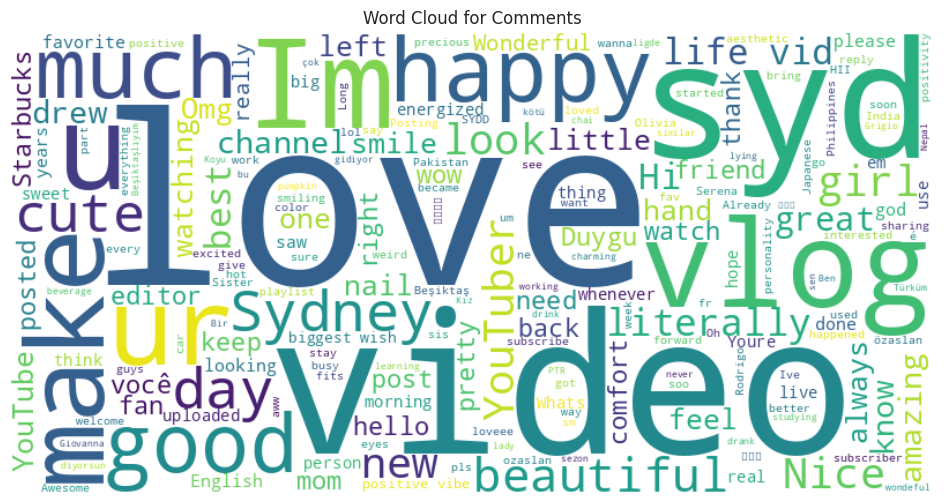

In [ ]:
from wordcloud import WordCloud

# Assuming you have a column 'Comments' containing text data
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(comments_df["Comments"]))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Comments")
plt.show()
